In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
tmdb = pd.read_csv('https://raw.githubusercontent.com/bayer-intern/datasets/master/tmdb_5000_movies.csv')

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

 # Tirar todas as conclusões sobre as variáveis baseadas na nota média

Como as conclusões serão baseadas na nota média, vou trabalhar com os dados nos quais a quantidade de votos for maior ou igual a 10.

In [130]:
tmdb_mais_10_votos = tmdb.query('vote_count >=10')

## Budget

Text(0.5, 1.0, 'Budget dos filmes do TMDB 5000 com mais de 10 votos')

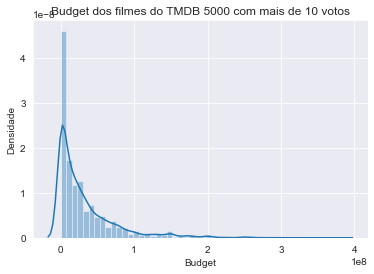

In [131]:
# histograma
ax = sns.distplot(tmdb_mais_10_votos.budget)
ax.set(xlabel = 'Budget', ylabel = 'Densidade')
ax.set_title('Budget dos filmes do TMDB 5000 com mais de 10 votos')

Text(0.5, 1.0, 'Distribuição do budget dos filmes do TMDB 5000 com mais de 10 votos')

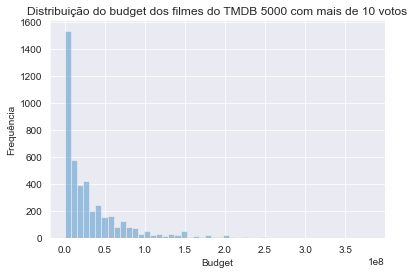

In [132]:
# frequência
ax = sns.distplot(tmdb_mais_10_votos.budget, norm_hist=False, kde=False)
ax.set(xlabel = 'Budget', ylabel = 'Frequência')
ax.set_title('Distribuição do budget dos filmes do TMDB 5000 com mais de 10 votos')

Text(0.5, 1.0, 'Budget dos filmes do TMDB 5000 com mais de 10 votos')

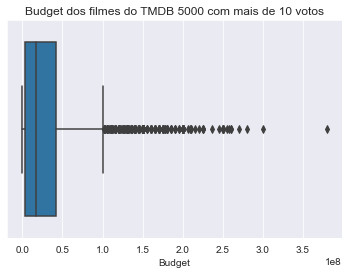

In [133]:
# boxplot
ax = sns.boxplot(tmdb_mais_10_votos.budget)
ax.set(xlabel = 'Budget')
ax.set_title('Budget dos filmes do TMDB 5000 com mais de 10 votos')

Notamos que há filmes com nota 0, seguindo do pressuposto que isso não é possível provavelmente é informação que está em falta e portanto, para garantir uma análise mais coerente irei trabalhar apenas com dados de budget diferente de 0.

In [134]:
tmdb_budget_dif_0 = tmdb_mais_10_votos.query('budget > 0')

Text(0.5, 1.0, 'Budget dos filmes do TMDB 5000 com mais de 10 votos e budget diferente de 0')

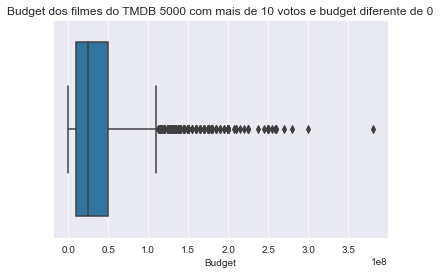

In [135]:
# boxplot
ax = sns.boxplot(tmdb_budget_dif_0.budget)
ax.set(xlabel = 'Budget')
ax.set_title('Budget dos filmes do TMDB 5000 com mais de 10 votos e budget diferente de 0')

C:\Users\gktkd\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:177: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  probs = [integrate.quad(func, support[i - 1], support[i],


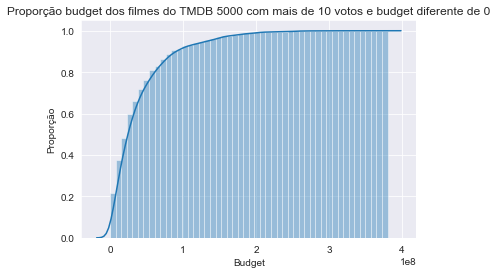

In [136]:
#Cumulativo TMDB - budget
ax = sns.distplot(tmdb_budget_dif_0.budget, hist_kws={"cumulative" : True}, kde_kws={"cumulative" : True})
ax.set(xlabel = 'Budget', ylabel = 'Proporção')
ax.set_title('Proporção budget dos filmes do TMDB 5000 com mais de 10 votos e budget diferente de 0')
ax = sns.set_style("darkgrid")

A partir da análise cumulativa dos dados de budget, concluímos que aproximadamente 90% dos filmes tem um budget maior ou igual a 100M.

### Analisada a variável budget isolada, agora vamos analisar sua relação com a nota média dos filmes.

In [137]:
tmdb_budget_dif_0.budget.median()

25000000.0

In [138]:
tmdb_budget_dif_0.budget.mean()

38099453.69188596

Como a média está muito distante da mediana, vou fazer as análises baseadas na mediana do budget.

In [139]:
tmdb_budget_acima_mediana = tmdb_budget_dif_0.query('budget >= budget.median()')

In [140]:
tmdb_budget_acima_mediana.describe()

budget             id   popularity       revenue      runtime  \
count  1.839000e+03    1839.000000  1839.000000  1.839000e+03  1839.000000   
mean   6.581557e+07   42928.157151    35.905400  1.759581e+08   113.712887   
std    4.533008e+07   72691.710853    43.593871  2.234667e+08    20.691190   
min    2.500000e+07      12.000000     1.004579  0.000000e+00    63.000000   
25%    3.500000e+07    4958.500000    14.609031  3.937390e+07    99.000000   
50%    5.000000e+07   10623.000000    26.251217  1.030393e+08   110.000000   
75%    8.000000e+07   44829.500000    44.582441  2.154118e+08   125.000000   
max    3.800000e+08  417859.000000   875.581305  2.787965e+09   248.000000   

       vote_average    vote_count  
count   1839.000000   1839.000000  
mean       6.196792   1283.901577  
std        0.822815   1658.195414  
min        2.300000     10.000000  
25%        5.700000    286.000000  
50%        6.200000    672.000000  
75%        6.700000   1540.000000  
max        8.500000  13752.000000

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com budget acima de 25M')

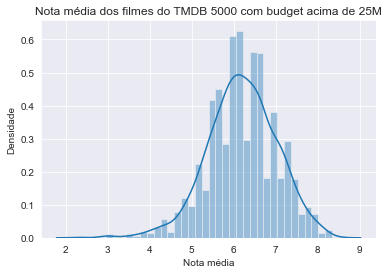

In [141]:
# histograma
ax = sns.distplot(tmdb_budget_acima_mediana.vote_average)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Nota média dos filmes do TMDB 5000 com budget acima de 25M')

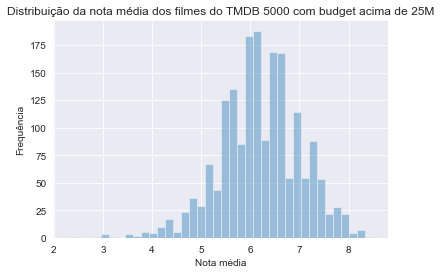

In [142]:
# frequência
ax = sns.distplot(tmdb_budget_acima_mediana.vote_average, norm_hist=False, kde=False)
ax.set(xlabel = 'Nota média', ylabel = 'Frequência')
ax.set_title('Distribuição da nota média dos filmes do TMDB 5000 com budget acima de 25M')
ax = sns.set_style("darkgrid")

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com budget acima de 25M')

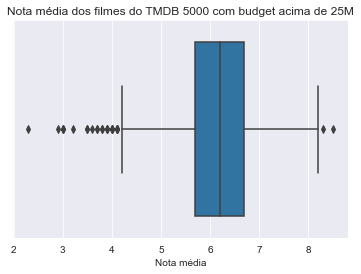

In [143]:
# boxplot
ax = sns.boxplot(tmdb_budget_acima_mediana.vote_average)
ax.set(xlabel = 'Nota média')
ax.set_title('Nota média dos filmes do TMDB 5000 com budget acima de 25M')

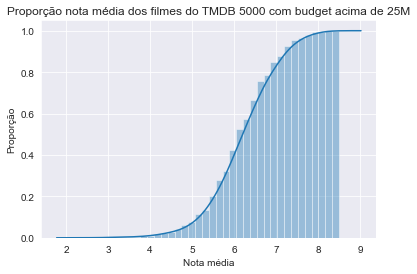

In [144]:
#Cumulativo TMDB - budget
ax = sns.distplot(tmdb_budget_acima_mediana.vote_average, hist_kws={"cumulative" : True}, kde_kws={"cumulative" : True})
ax.set(xlabel = 'Nota média', ylabel = 'Proporção')
ax.set_title('Proporção nota média dos filmes do TMDB 5000 com budget acima de 25M')
ax = sns.set_style("darkgrid")

- A nota média dos filmes com budget acima ou igual a mediana (25M) é de aproximadamente 6,2. 
- A menor nota foi de 2,3 e a maior foi 8,5.
- Aproximadamente 85% dos filmes tiveram notas médias menor ou igual a 7.

Agora vou fazer a mesma análise para os filmes com budget abaixo da mediana, para ver se a nota média sofre alterações.

In [145]:
tmdb_budget_abaixo_mediana = tmdb_budget_dif_0.query('budget < budget.median()')

In [146]:
tmdb_budget_abaixo_mediana.describe()

budget             id   popularity       revenue      runtime  \
count  1.809000e+03    1809.000000  1809.000000  1.809000e+03  1808.000000   
mean   9.923695e+06   51886.464345    17.554076  3.744456e+07   105.684181   
std    6.909126e+06   84346.214009    18.014090  6.752849e+07    19.877916   
min    1.000000e+00       5.000000     0.011697  0.000000e+00     0.000000   
25%    3.730500e+06    8328.000000     5.759545  7.484530e+05    93.000000   
50%    9.000000e+06   13937.000000    12.150871  1.340195e+07   102.000000   
75%    1.500000e+07   46989.000000    22.793929  4.293104e+07   114.000000   
max    2.400000e+07  389425.000000   192.528841  7.929106e+08   338.000000   

       vote_average   vote_count  
count   1809.000000  1809.000000  
mean       6.336429   477.592040  
std        0.928116   770.613026  
min        2.800000    10.000000  
25%        5.800000    72.000000  
50%        6.400000   207.000000  
75%        7.000000   537.000000  
max        8.400000  8428.000000

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com budget abaixo de 25M')

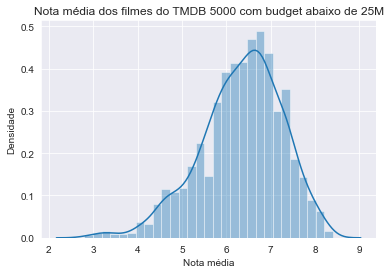

In [147]:
# histograma
ax = sns.distplot(tmdb_budget_abaixo_mediana.vote_average)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Nota média dos filmes do TMDB 5000 com budget abaixo de 25M')

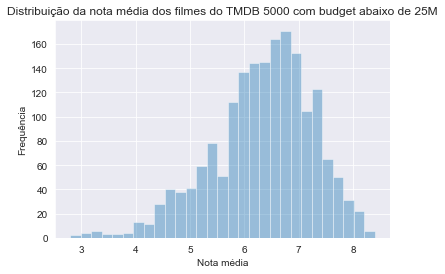

In [148]:
# frequência
ax = sns.distplot(tmdb_budget_abaixo_mediana.vote_average, norm_hist=False, kde=False)
ax.set(xlabel = 'Nota média', ylabel = 'Frequência')
ax.set_title('Distribuição da nota média dos filmes do TMDB 5000 com budget abaixo de 25M')
ax = sns.set_style("darkgrid")

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com budget abaixo de 25M')

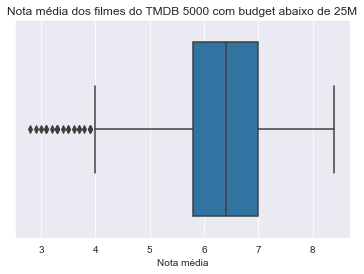

In [149]:
# boxplot
ax = sns.boxplot(tmdb_budget_abaixo_mediana.vote_average)
ax.set(xlabel = 'Nota média')
ax.set_title('Nota média dos filmes do TMDB 5000 com budget abaixo de 25M')

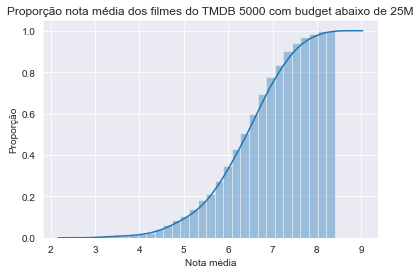

In [150]:
#Cumulativo TMDB - budget
ax = sns.distplot(tmdb_budget_abaixo_mediana.vote_average, hist_kws={"cumulative" : True}, kde_kws={"cumulative" : True})
ax.set(xlabel = 'Nota média', ylabel = 'Proporção')
ax.set_title('Proporção nota média dos filmes do TMDB 5000 com budget abaixo de 25M')
ax = sns.set_style("darkgrid")

- A nota média dos filmes com budget abaixo da mediana (25M) é de aproximadamente 6,3. 
- A menor nota foi de 2,8 e a maior foi 8,4.
- Aproximadamente 78% dos filmes tiveram notas médias menor ou igual a 7.

Analisando as notas médias, mínimas e máximas de acordo com a mediana do budget podemos concluir que o budget não influência na nota de um filme. Entretanto, a partir da análise cumulativa das notas vemos uma tendência de notas mais altas (acima de 7) em filmes com o budget abaixo da mediana.

## Popularity

Text(0.5, 1.0, 'Popularidade dos filmes do TMDB 5000 com mais de 10 votos')

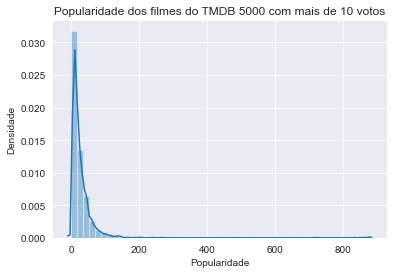

In [151]:
# histograma
ax = sns.distplot(tmdb_mais_10_votos.popularity)
ax.set(xlabel = 'Popularidade', ylabel = 'Densidade')
ax.set_title('Popularidade dos filmes do TMDB 5000 com mais de 10 votos')

Text(0.5, 1.0, 'Distribuição da popularidade dos filmes do TMDB 5000 com mais de 10 votos')

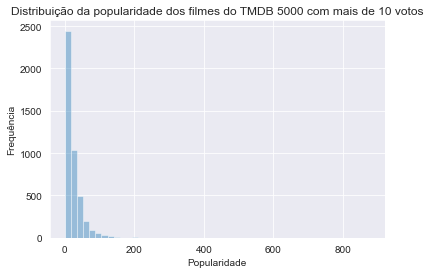

In [152]:
# frequência
ax = sns.distplot(tmdb_mais_10_votos.popularity, norm_hist = False, kde = False)
ax.set(xlabel = 'Popularidade', ylabel = 'Frequência')
ax.set_title('Distribuição da popularidade dos filmes do TMDB 5000 com mais de 10 votos')

Text(0.5, 1.0, 'Popularidade dos filmes do TMDB 5000 com mais de 10 votos')

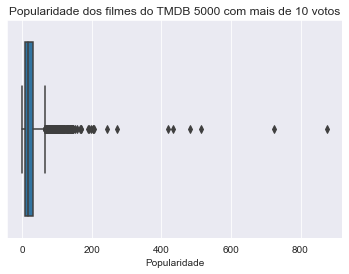

In [153]:
# boxplot
ax = sns.boxplot(tmdb_mais_10_votos.popularity)
ax.set(xlabel = 'Popularidade')
ax.set_title('Popularidade dos filmes do TMDB 5000 com mais de 10 votos')

In [154]:
tmdb_mais_10_votos.describe()

budget             id   popularity       revenue      runtime  \
count  4.392000e+03    4392.000000  4392.000000  4.392000e+03  4391.000000   
mean   3.164545e+07   49204.119991    23.448815  8.990969e+07   108.430881   
std    4.162736e+07   80136.249777    32.592158  1.682870e+08    21.014719   
min    0.000000e+00       5.000000     0.011697  0.000000e+00     0.000000   
25%    2.895962e+06    8403.500000     6.512166  1.365700e+04    95.000000   
50%    1.700000e+07   13084.500000    14.827784  2.685837e+07   105.000000   
75%    4.200000e+07   46831.250000    30.258282  1.022818e+08   118.500000   
max    3.800000e+08  417859.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4392.000000   4392.000000  
mean       6.226935    754.441712  
std        0.893215   1272.263761  
min        1.900000     10.000000  
25%        5.700000     83.750000  
50%        6.300000    288.500000  
75%        6.800000    831.000000  
max        8.500000  13752.000000

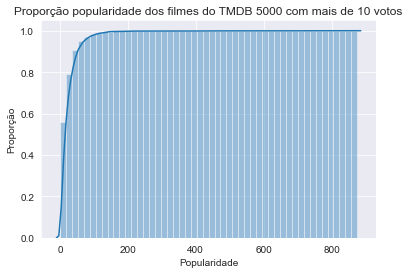

In [155]:
#Cumulativo TMDB - popularity
ax = sns.distplot(tmdb_mais_10_votos.popularity, hist_kws={"cumulative" : True}, kde_kws={"cumulative" : True})
ax.set(xlabel = 'Popularidade', ylabel = 'Proporção')
ax.set_title('Proporção popularidade dos filmes do TMDB 5000 com mais de 10 votos')
ax = sns.set_style("darkgrid")

- Existem filmes com popularidade muito baixa, próxima a zero, e filmes com popularidade altíssimas, maior que 600, apesar de extremos esses valores serão considerados pois a popularidade não é uma escala pré-definida, não tenho um motivo analítico para não utilizar esses valores baseado apenas na popularidade.
- A popularidade média dos filmes é de 23 e a mediana é 15. Portanto, as análises serão realizadas a partir da mediana.

### Analise da mediana da popularidade em relação à nota média.

In [156]:
tmdb_pupularity_acima_mediana = tmdb_mais_10_votos.query('popularity >= popularity.median()')

In [157]:
tmdb_pupularity_acima_mediana.describe()

budget             id   popularity       revenue      runtime  \
count  2.196000e+03    2196.000000  2196.000000  2.196000e+03  2196.000000   
mean   4.917588e+07   51783.266849    40.002165  1.627878e+08   112.107923   
std    4.937163e+07   82752.399861    39.502355  2.109501e+08    20.551612   
min    0.000000e+00       5.000000    14.831402  0.000000e+00    63.000000   
25%    1.500000e+07    2118.750000    20.824797  3.688764e+07    97.000000   
50%    3.400000e+07   10399.000000    30.262543  9.541756e+07   108.000000   
75%    6.800000e+07   61816.000000    45.999080  1.979370e+08   123.000000   
max    3.800000e+08  417859.000000   875.581305  2.787965e+09   238.000000   

       vote_average    vote_count  
count   2196.000000   2196.000000  
mean       6.482286   1375.760018  
std        0.792787   1547.512303  
min        2.900000    122.000000  
25%        5.900000    458.750000  
50%        6.500000    817.000000  
75%        7.100000   1596.250000  
max        8.500000  13752.000000

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com popularidade acima de 15')

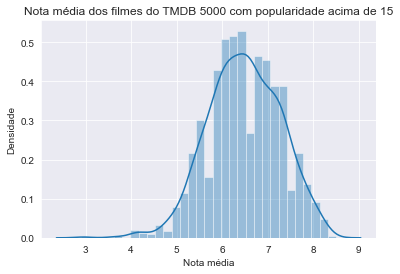

In [158]:
# histograma
ax = sns.distplot(tmdb_pupularity_acima_mediana.vote_average)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Nota média dos filmes do TMDB 5000 com popularidade acima de 15')

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com popularidade acima de 15')

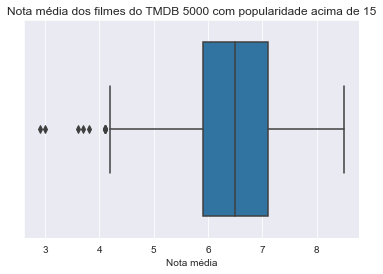

In [159]:
# boxplot
ax = sns.boxplot(tmdb_pupularity_acima_mediana.vote_average)
ax.set(xlabel = 'Nota média')
ax.set_title('Nota média dos filmes do TMDB 5000 com popularidade acima de 15')

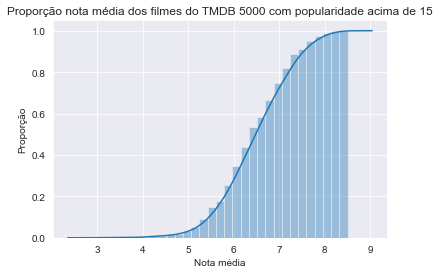

In [160]:
#Cumulativo TMDB - popularity
ax = sns.distplot(tmdb_pupularity_acima_mediana.vote_average, hist_kws={"cumulative" : True}, kde_kws={"cumulative" : True})
ax.set(xlabel = 'Nota média', ylabel = 'Proporção')
ax.set_title('Proporção nota média dos filmes do TMDB 5000 com popularidade acima de 15')
ax = sns.set_style("darkgrid")

- A nota média dos filmes com popularidade acima da mediana (15) é de aproximadamente 6,5. 
- A menor nota foi de 2,9 e a maior foi 8,5.
- Aproximadamente 78% dos filmes tem nota média menor ou igual a 7.


Analisando agora a nota média para filmes com a popularidade abaixo da mediana.

In [161]:
tmdb_pupularity_abaixo_mediana = tmdb_mais_10_votos.query('popularity < popularity.median()')

In [162]:
tmdb_pupularity_abaixo_mediana.describe()

budget             id   popularity       revenue      runtime  \
count  2.196000e+03    2196.000000  2196.000000  2.196000e+03  2195.000000   
mean   1.411502e+07   46624.973133     6.895466  1.703161e+07   104.752164   
std    2.034681e+07   77364.675231     4.033490  3.907347e+07    20.832811   
min    0.000000e+00      20.000000     0.011697  0.000000e+00     0.000000   
25%    0.000000e+00   10265.000000     3.426935  0.000000e+00    92.000000   
50%    6.000000e+06   14889.500000     6.510475  8.587655e+05   101.000000   
75%    2.000000e+07   39224.750000    10.129493  1.899267e+07   114.000000   
max    2.100000e+08  407887.000000    14.824166  6.261377e+08   338.000000   

       vote_average   vote_count  
count   2196.000000  2196.000000  
mean       5.971585   133.123406  
std        0.914905   266.136505  
min        1.900000    10.000000  
25%        5.400000    35.750000  
50%        6.000000    83.500000  
75%        6.600000   162.250000  
max        8.400000  5181.000000

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com popularidade abaixo de 15')

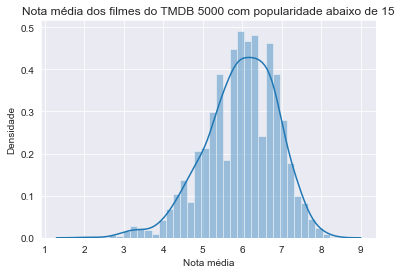

In [163]:
# histograma
ax = sns.distplot(tmdb_pupularity_abaixo_mediana.vote_average)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Nota média dos filmes do TMDB 5000 com popularidade abaixo de 15')

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com popularidade abaixo de 15')

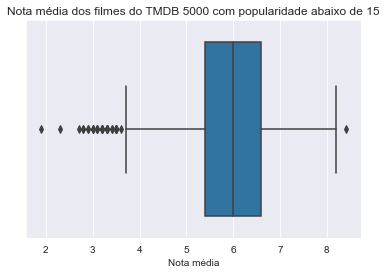

In [164]:
# boxplot
ax = sns.boxplot(tmdb_pupularity_abaixo_mediana.vote_average)
ax.set(xlabel = 'Nota média')
ax.set_title('Nota média dos filmes do TMDB 5000 com popularidade abaixo de 15')

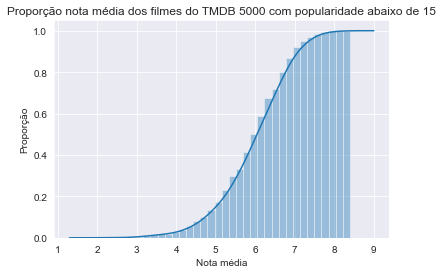

In [165]:
#Cumulativo TMDB - popularity
ax = sns.distplot(tmdb_pupularity_abaixo_mediana.vote_average, hist_kws={"cumulative" : True}, kde_kws={"cumulative" : True})
ax.set(xlabel = 'Nota média', ylabel = 'Proporção')
ax.set_title('Proporção nota média dos filmes do TMDB 5000 com popularidade abaixo de 15')
ax = sns.set_style("darkgrid")

- A nota média dos filmes com popularidade abaixo da mediana (15) é de aproximadamente 5,9. 
- A menor nota foi de 0,9 e a maior foi 8,4.
- Aproximadamente 90% dos filmes tem nota média menor ou igual 7.

- O gráfico da densidade dos filmes com popularidade acima da mediana é um pouco mais "gordo" do que o com a popularidade abaixo da mediana, podendo chegar a conclusão que os dados são mais dispersos. Ou seja, no gráfico da popularidade abaixo da mediana temos uma maior concentração próximo à nota média.
- A partir dos gráficos de boxplot percebemos mais claramente que os filmes com popularidade abaixo da mediana tem mais outliers que os com popularidade acima da mediana, ambos tendendo ao zero.
- A partir dos valores de nota média, já vemos claramente que a nota média está relacionada com a popularidade. Mas não podemos dizer que baixa popularidade significa baixa nota média. Temos filme com popularidade abaixo da mediana com nota média de 8,4 e filmes acima da mediana com nota média de 8,5.
- Podemos dizer que existe uma tendência de que filmes que baixa popularidade tenham nota média baixa (menor que 7) já que aproximadamente 90% dos filmes apresentaram esse resultado, contra 78% dos filmes com popularidade acima da mediana.

## Revenue

Text(0.5, 1.0, 'Receita dos filmes do TMDB 5000 com mais de 10 votos')

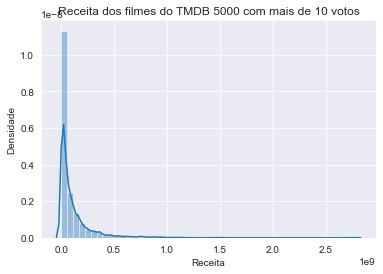

In [166]:
# histograma
ax = sns.distplot(tmdb_mais_10_votos.revenue)
ax.set(xlabel = 'Receita', ylabel = 'Densidade')
ax.set_title('Receita dos filmes do TMDB 5000 com mais de 10 votos')

Text(0.5, 1.0, 'Distribuição da receita dos filmes do TMDB 5000 com mais de 10 votos')

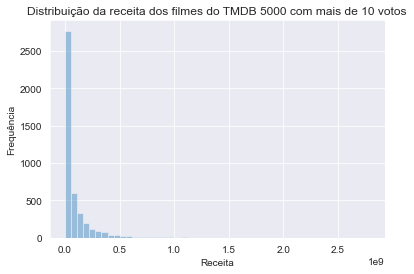

In [167]:
# frequência
ax = sns.distplot(tmdb_mais_10_votos.revenue, norm_hist = False, kde = False)
ax.set(xlabel = 'Receita', ylabel = 'Frequência')
ax.set_title('Distribuição da receita dos filmes do TMDB 5000 com mais de 10 votos')

Text(0.5, 1.0, 'Receita dos filmes do TMDB 5000 com mais de 10 votos')

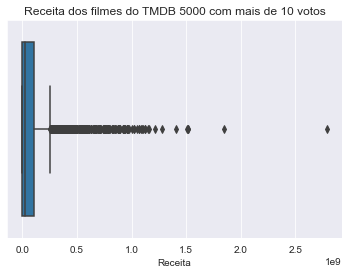

In [168]:
# boxplot
ax = sns.boxplot(tmdb_mais_10_votos.revenue)
ax.set(xlabel = 'Receita')
ax.set_title('Receita dos filmes do TMDB 5000 com mais de 10 votos')

Partindo da suposição que um filme não pode ter receita igual a 0, irei retirar esses dados da base.

In [169]:
tmdb_revenue_dif_0 = tmdb_mais_10_votos.query('revenue > 0')

Text(0.5, 1.0, 'Receita dos filmes do TMDB 5000 com receita diferente de 0')

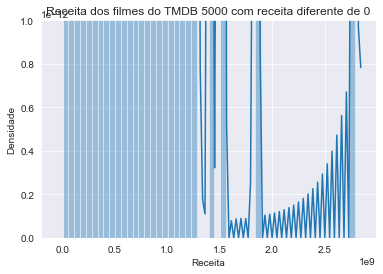

In [170]:
# histograma
ax = sns.distplot(tmdb_revenue_dif_0.revenue)
ax.set(xlabel = 'Receita', ylabel = 'Densidade')
ax.set_title('Receita dos filmes do TMDB 5000 com receita diferente de 0')

Text(0.5, 1.0, 'Distribuição da receita dos filmes do TMDB 5000 com receita diferente de 0')

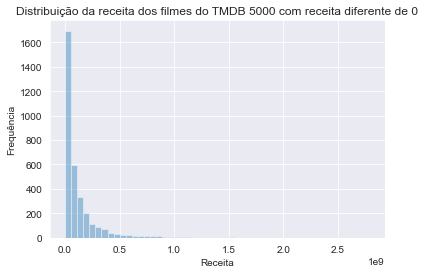

In [171]:
# frequência
ax = sns.distplot(tmdb_revenue_dif_0.revenue, norm_hist = False, kde = False)
ax.set(xlabel = 'Receita', ylabel = 'Frequência')
ax.set_title('Distribuição da receita dos filmes do TMDB 5000 com receita diferente de 0')

Text(0.5, 1.0, 'Receita dos filmes do TMDB 5000 com receita diferente de 0')

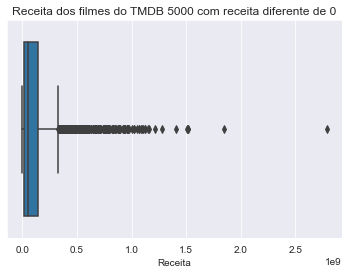

In [172]:
# boxplot
ax = sns.boxplot(tmdb_revenue_dif_0.revenue)
ax.set(xlabel = 'Receita')
ax.set_title('Receita dos filmes do TMDB 5000 com receita diferente de 0')

In [173]:
tmdb_revenue_dif_0.describe()

budget             id   popularity       revenue      runtime  \
count  3.319000e+03    3319.000000  3319.000000  3.319000e+03  3319.000000   
mean   3.946443e+07   45021.037361    28.734910  1.189766e+08   110.574872   
std    4.434712e+07   74654.130918    35.740866  1.844443e+08    21.028649   
min    0.000000e+00       5.000000     0.034259  5.000000e+00    41.000000   
25%    9.450000e+06    5017.500000    10.432250  1.685985e+07    96.000000   
50%    2.500000e+07   11439.000000    20.230535  5.358740e+07   107.000000   
75%    5.400000e+07   45467.000000    36.766035  1.416468e+08   121.000000   
max    3.800000e+08  417859.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   3319.000000   3319.000000  
mean       6.322236    960.557096  
std        0.851524   1399.259038  
min        1.900000     10.000000  
25%        5.800000    177.000000  
50%        6.400000    453.000000  
75%        6.900000   1112.500000  
max        8.500000  13752.000000

- Não consigo explicar o que aconteceu com o gráfico da densidade da receita diferente de zero.
- A receita média dos filmes foi de 118M e a mediana foi de 53M. Pela grande diferença entre as duas, utilizarei a mediana.

### Analise da mediana da receita em relação à nota média.

In [174]:
tmdb_revenue_acima_mediana = tmdb_revenue_dif_0.query('revenue >= revenue.median()')

In [175]:
tmdb_revenue_acima_mediana.describe()

budget            id   popularity       revenue      runtime  \
count  1.660000e+03    1660.00000  1660.000000  1.660000e+03  1660.000000   
mean   6.134403e+07   46029.33494    42.197289  2.184044e+08   113.750602   
std    5.120575e+07   77991.30440    44.611740  2.191194e+08    20.831723   
min    0.000000e+00      11.00000     1.859364  5.358740e+07    69.000000   
25%    2.500000e+07    2043.75000    20.697456  8.883941e+07    98.000000   
50%    4.800000e+07   10029.00000    32.844110  1.416468e+08   111.000000   
75%    8.000000e+07   49525.25000    49.610497  2.563778e+08   125.000000   
max    3.800000e+08  417859.00000   875.581305  2.787965e+09   248.000000   

       vote_average    vote_count  
count   1660.000000   1660.000000  
mean       6.397289   1563.545181  
std        0.780132   1702.288178  
min        3.200000     24.000000  
25%        5.900000    496.750000  
50%        6.400000    964.500000  
75%        7.000000   1955.250000  
max        8.400000  13752.000000

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com receita acima de 53M')

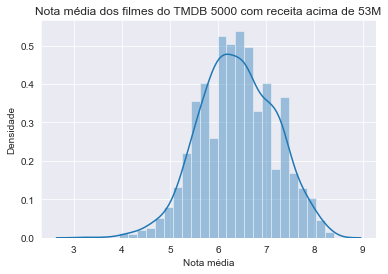

In [176]:
# histograma
ax = sns.distplot(tmdb_revenue_acima_mediana.vote_average)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Nota média dos filmes do TMDB 5000 com receita acima de 53M')

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com receita acima de 53M')

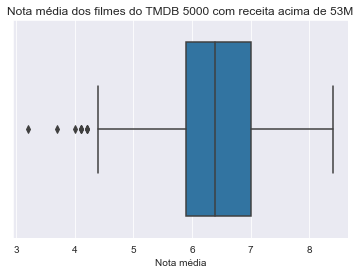

In [177]:
# boxplot
ax = sns.boxplot(tmdb_revenue_acima_mediana.vote_average)
ax.set(xlabel = 'Nota média')
ax.set_title('Nota média dos filmes do TMDB 5000 com receita acima de 53M')

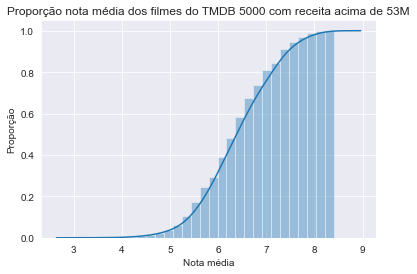

In [178]:
#Cumulativo TMDB - revenue
ax = sns.distplot(tmdb_revenue_acima_mediana.vote_average, hist_kws={"cumulative" : True}, kde_kws={"cumulative" : True})
ax.set(xlabel = 'Nota média', ylabel = 'Proporção')
ax.set_title('Proporção nota média dos filmes do TMDB 5000 com receita acima de 53M')
ax = sns.set_style("darkgrid")

- A nota média dos filmes com revenue acima da mediana (53M) é de aproximadamente 6,4. 
- A menor nota foi de 3,2 e a maior foi 8,4.
- A partir da análise do boxplot podemos notar que existem alguns filmes com nota média abaixo de aproximadamente 4,3.
- Aproximadamente 80% dos filmes tem nota média menor ou igual 7.

Agora a mesma análise para os filmes com receita abaixo da mediana.

In [179]:
tmdb_revenue_abaixo_mediana = tmdb_revenue_dif_0.query('revenue < revenue.median()')

In [180]:
tmdb_revenue_abaixo_mediana.describe()

budget             id   popularity       revenue      runtime  \
count  1.659000e+03    1659.000000  1659.000000  1.659000e+03  1659.000000   
mean   1.757164e+07   44012.132007    15.264417  1.948886e+07   107.397227   
std    1.879413e+07   71167.778893    14.210357  1.538006e+07    20.748933   
min    0.000000e+00       5.000000     0.034259  5.000000e+00    41.000000   
25%    3.500000e+06    9353.500000     6.208804  5.852680e+06    94.000000   
50%    1.200000e+07   13496.000000    11.725805  1.685612e+07   103.000000   
75%    2.500000e+07   43903.500000    19.466603  3.167584e+07   116.000000   
max    1.500000e+08  375290.000000   192.528841  5.347817e+07   338.000000   

       vote_average   vote_count  
count   1659.000000  1659.000000  
mean       6.247137   357.205546  
std        0.911485   538.882937  
min        1.900000    10.000000  
25%        5.700000    82.000000  
50%        6.300000   200.000000  
75%        6.900000   399.500000  
max        8.500000  8205.000000

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com receita abaixo de 53M')

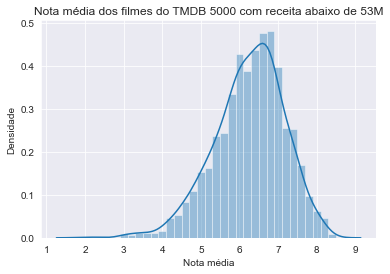

In [181]:
# histograma
ax = sns.distplot(tmdb_revenue_abaixo_mediana.vote_average)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Nota média dos filmes do TMDB 5000 com receita abaixo de 53M')

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com receita abaixo de 53M')

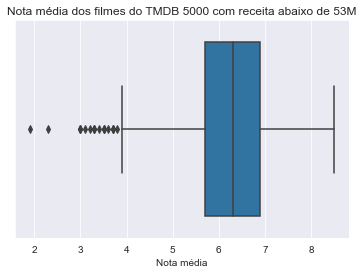

In [182]:
# boxpplot
ax = sns.boxplot(tmdb_revenue_abaixo_mediana.vote_average)
ax.set(xlabel = 'Nota média')
ax.set_title('Nota média dos filmes do TMDB 5000 com receita abaixo de 53M')

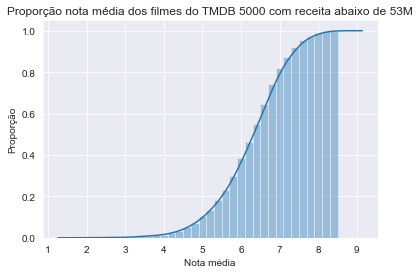

In [183]:
#Cumulativo TMDB - revenue
ax = sns.distplot(tmdb_revenue_abaixo_mediana.vote_average, hist_kws={"cumulative" : True}, kde_kws={"cumulative" : True})
ax.set(xlabel = 'Nota média', ylabel = 'Proporção')
ax.set_title('Proporção nota média dos filmes do TMDB 5000 com receita abaixo de 53M')
ax = sns.set_style("darkgrid")

- A nota média dos filmes com revenue abaixo da mediana (53M) é de aproximadamente 6,2. 
- A menor nota foi de 1,9 e a maior foi 8,5.
- A partir da análise do boxplot podemos notar que existem alguns filmes com nota média abaixo de aproximadamente 4.
- Aproximadamente 80% dos filmes tem nota média menor ou igual 7.

- Comparando as notas médias mínimas dos filmes com receita maior e menor que a média, notamos que a nota média é bem menor para os filmes com revenue abaixo da mediana, o mesmo comportamento não é observado nas médias e máximas.
- Com o gráfico de densidade dos filmes com receita abaixo da mediana notamos maior concentração próxima à media do que dos filmes com receita acima da mediana.
- A parir da comparação dos gráficos de boxplot notamos uma "calda" para a esquerda maior no gráfico dos dados de receita abaixo da mediana, ou seja, filmes com menor receita tendem a ter menores notas médias, apesar dessa tendência não ser comprobada pelo gráfico cumulativo.

## Runtime

Text(0.5, 1.0, 'Duração dos filmes do TMDB 5000 com mais de 10 votos')

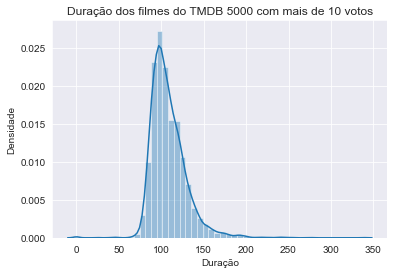

In [184]:
# histograma
ax = sns.distplot(tmdb_mais_10_votos.runtime)
ax.set(xlabel = 'Duração', ylabel = 'Densidade')
ax.set_title('Duração dos filmes do TMDB 5000 com mais de 10 votos')

Text(0.5, 1.0, 'Distribuição da duração dos filmes do TMDB 5000 com mais de 10 votos')

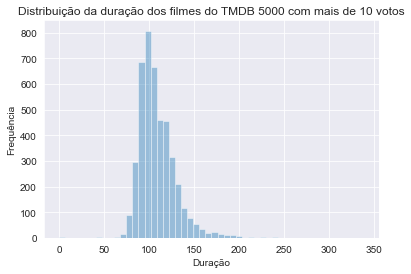

In [185]:
# frequência
ax = sns.distplot(tmdb_mais_10_votos.runtime, norm_hist = False, kde = False)
ax.set(xlabel = 'Duração', ylabel = 'Frequência')
ax.set_title('Distribuição da duração dos filmes do TMDB 5000 com mais de 10 votos')

Text(0.5, 1.0, 'Duração dos filmes do TMDB 5000 com mais de 10 votos')

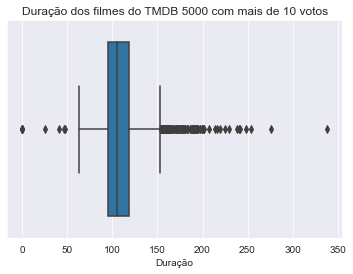

In [186]:
# histograma
ax = sns.boxplot(tmdb_mais_10_votos.runtime)
ax.set(xlabel = 'Duração')
ax.set_title('Duração dos filmes do TMDB 5000 com mais de 10 votos')

Para efeitos de análise, retirarei os filmes com duração igual a 0, assumindo um erro na base.

In [187]:
tmdb_runtime_dif_0 = tmdb_mais_10_votos.query('runtime > 0')

Text(0.5, 1.0, 'Duração dos filmes do TMDB 5000 com duração diferente de 0')

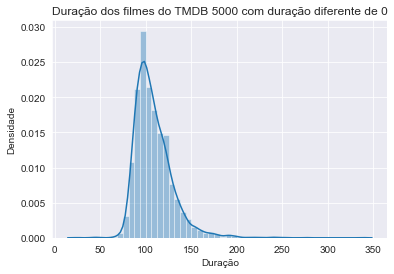

In [188]:
# histograma
ax = sns.distplot(tmdb_runtime_dif_0.runtime)
ax.set(xlabel = 'Duração', ylabel = 'Densidade')
ax.set_title('Duração dos filmes do TMDB 5000 com duração diferente de 0')

Text(0.5, 1.0, 'Duração dos filmes do TMDB 5000 com duração diferente de 0')

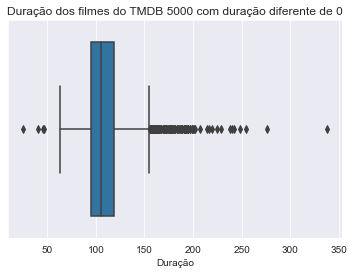

In [189]:
# boxplot
ax = sns.boxplot(tmdb_runtime_dif_0.runtime)
ax.set(xlabel = 'Duração')
ax.set_title('Duração dos filmes do TMDB 5000 com duração diferente de 0')

In [190]:
tmdb_runtime_dif_0.describe()

budget             id   popularity       revenue      runtime  \
count  4.386000e+03    4386.000000  4386.000000  4.386000e+03  4386.000000   
mean   3.168441e+07   49033.580027    23.479462  9.003269e+07   108.554492   
std    4.164199e+07   79973.677732    32.603900  1.683692e+08    20.705083   
min    0.000000e+00       5.000000     0.011697  0.000000e+00    25.000000   
25%    2.917508e+06    8387.000000     6.539999  2.078500e+04    95.000000   
50%    1.700000e+07   13073.000000    14.838243  2.707335e+07   105.000000   
75%    4.200000e+07   46521.750000    30.293747  1.023445e+08   119.000000   
max    3.800000e+08  417859.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4386.000000   4386.000000  
mean       6.228659    755.455084  
std        0.891691   1272.838558  
min        1.900000     10.000000  
25%        5.700000     84.000000  
50%        6.300000    290.000000  
75%        6.800000    831.750000  
max        8.500000  13752.000000

- A duração média dos filmes é de 108,5 min e a mediana é de 105 min.
- A duração mínima é de 25 min e a máx é de 338 min.

Apesar da mediana e da média nesse caso estarem muito próximas ainda não são iguais, portanto continuarei a trabalhar com a mediana.

### Analise da mediana da duração em relação à nota média.

In [191]:
tmdb_runtime_acima_mediana = tmdb_runtime_dif_0.query('runtime >= runtime.median()')

In [192]:
tmdb_runtime_acima_mediana.describe()

budget             id   popularity       revenue      runtime  \
count  2.200000e+03    2200.000000  2200.000000  2.200000e+03  2200.000000   
mean   4.036166e+07   45891.847273    29.001607  1.197697e+08   123.325000   
std    4.722052e+07   77487.578031    37.198762  1.998239e+08    19.114773   
min    0.000000e+00      11.000000     0.011697  0.000000e+00   105.000000   
25%    7.650000e+06    3073.500000     8.300431  6.443801e+06   110.000000   
50%    2.500000e+07   11323.500000    18.944393  4.567321e+07   118.000000   
75%    5.500000e+07   44611.750000    37.927824  1.470274e+08   130.000000   
max    3.800000e+08  407887.000000   724.247784  2.787965e+09   338.000000   

       vote_average    vote_count  
count   2200.000000   2200.000000  
mean       6.535409   1021.644545  
std        0.755345   1570.448341  
min        3.000000     10.000000  
25%        6.000000    122.000000  
50%        6.600000    399.500000  
75%        7.100000   1225.250000  
max        8.500000  13752.000000

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com duração acima de 108 min')

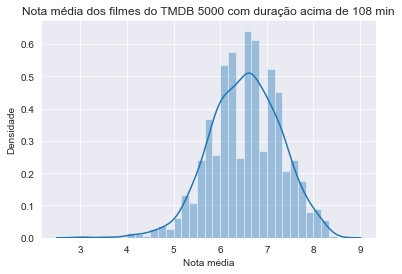

In [193]:
# histograma
ax = sns.distplot(tmdb_runtime_acima_mediana.vote_average)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Nota média dos filmes do TMDB 5000 com duração acima de 108 min')

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com duração acima de 108 min')

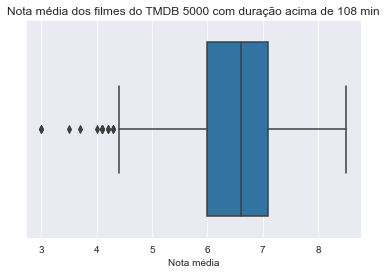

In [194]:
# boxplot
ax = sns.boxplot(tmdb_runtime_acima_mediana.vote_average)
ax.set(xlabel = 'Nota média')
ax.set_title('Nota média dos filmes do TMDB 5000 com duração acima de 108 min')

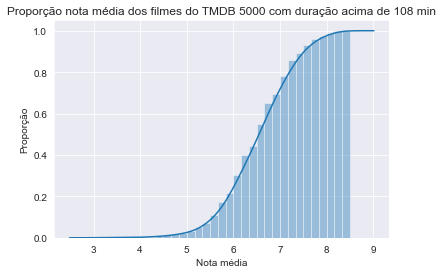

In [195]:
#Cumulativo TMDB - runtime
ax = sns.distplot(tmdb_runtime_acima_mediana.vote_average, hist_kws={"cumulative" : True}, kde_kws={"cumulative" : True})
ax.set(xlabel = 'Nota média', ylabel = 'Proporção')
ax.set_title('Proporção nota média dos filmes do TMDB 5000 com duração acima de 108 min')
ax = sns.set_style("darkgrid")

- A nota média dos filmes com duração acima da mediana (108 min) é de aproximadamente 6,5. 
- A menor nota foi de 3 e a maior foi 8,5.
- A partir da análise do boxplot podemos notar que existem alguns filmes com nota média abaixo de aproximadamente 4,5.
- Aproximadamente 78% dos filmes tem nota média menor ou igual 7.

In [125]:
tmdb_runtime_abaixo_mediana = tmdb_runtime_dif_0.query('runtime < runtime.median()')

In [126]:
tmdb_runtime_abaixo_mediana.describe()

budget             id   popularity       revenue      runtime  \
count  2.186000e+03    2186.000000  2186.000000  2.186000e+03  2186.000000   
mean   2.295158e+07   52195.433669    17.921951  6.010521e+07    93.689387   
std    3.292176e+07   82296.711628    26.059712  1.221439e+08     7.203485   
min    0.000000e+00       5.000000     0.023436  0.000000e+00    25.000000   
25%    4.097500e+05    9776.500000     5.248753  0.000000e+00    89.000000   
50%    1.000000e+07   14438.500000    11.746185  1.233178e+07    95.000000   
75%    3.000000e+07   49526.750000    23.304152  6.551738e+07    99.000000   
max    2.600000e+08  417859.000000   875.581305  1.274219e+09   104.000000   

       vote_average   vote_count  
count   2186.000000  2186.000000  
mean       5.919945   487.560842  
std        0.911807   791.267481  
min        1.900000    10.000000  
25%        5.400000    62.000000  
50%        6.000000   208.500000  
75%        6.500000   568.000000  
max        8.400000  6870.000000

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com duração abaixo de 108 min')

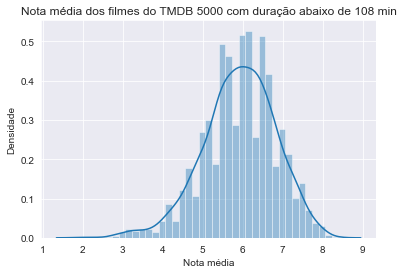

In [127]:
# histograma
ax = sns.distplot(tmdb_runtime_abaixo_mediana.vote_average)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Nota média dos filmes do TMDB 5000 com duração abaixo de 108 min')

Text(0.5, 1.0, 'Nota média dos filmes do TMDB 5000 com duração abaixo de 108 min')

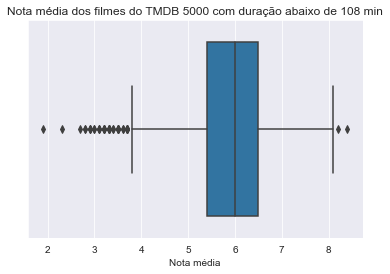

In [128]:
# boxplot
ax = sns.boxplot(tmdb_runtime_abaixo_mediana.vote_average)
ax.set(xlabel = 'Nota média')
ax.set_title('Nota média dos filmes do TMDB 5000 com duração abaixo de 108 min')

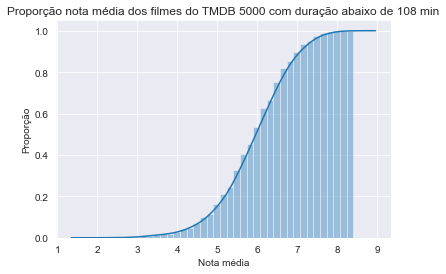

In [129]:
#Cumulativo TMDB - runtime
ax = sns.distplot(tmdb_runtime_abaixo_mediana.vote_average, hist_kws={"cumulative" : True}, kde_kws={"cumulative" : True})
ax.set(xlabel = 'Nota média', ylabel = 'Proporção')
ax.set_title('Proporção nota média dos filmes do TMDB 5000 com duração abaixo de 108 min')
ax = sns.set_style("darkgrid")

- A nota média dos filmes com duração abaixo da mediana (108 min) é de aproximadamente 5,9. 
- A menor nota foi de 1,9 e a maior foi 8,4.
- A partir da análise do boxplot podemos notar que existem alguns filmes com nota média abaixo de aproximadamente 3,9. Notamos também que os filmes com maiores notas são "outliers".
- Aproximadamente 85% dos filmes tem nota média menor ou igual 7.

- Comparando as notas médias mínimas dos filmes com duração maior e menor que a média, notamos que a nota média é bem menor para os filmes com duração abaixo da mediana, o mesmo comportamento não é observado nas médias e máximas.
- Com o gráfico de densidade dos filmes com duração abaixo da mediana notamos maior concentração próxima à media do que dos filmes com duração acima da mediana.
- A parir da comparação dos gráficos de boxplot notamos uma "calda" para a esquerda maior no gráfico dos dados de duração abaixo da mediana, ou seja, filmes com menor duração tendem a ter menores notas médias, e temos uma prova dessa tendência pelo gráfico cumulativo.
- Notamos também que as maiores notas nos filmes com duração abaixo da mediana foram "pontos fora da curva", enquanto que nos filmes com duração acima da mediana foram comportamentos "normais".